
# Grid Search Double Exponential Smoothing

Double Exponential Smoothing (DES) also called the Holtz Method is a method for forecasting for this project we will use univariate data for times series analysis. 

This method incorporates the usage of past observations of weighted averages to predict future values.

### Configuration Parameters

- t = Trend
- d = Dampening
- s = Seasonality
- p = Seasonal Period
- b = Box-Cox Transform
- r = Remove Bias

In [9]:
import pandas as pd
import numpy as np
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from numpy import array
import matplotlib.pyplot as plt


In [83]:
# Bring in our cpi data
cpi_u = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data_2/SeriesReport-cpi-all-u-notadj.48.csv')
cpi_w = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data_2/SeriesReport-cpi-urbwage-notadj.48.csv')

In [7]:
cpi_u.copy()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,23.7,23.5,23.4,23.8,23.9,24.1,24.4,24.5,24.5,24.4,24.2,24.1
1,1949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
2,1950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
3,1951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
4,1952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7


In [56]:
ccpi = cpi_u.head()
ccpi[0:][1:]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
2,1950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
3,1951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
4,1952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7


In [5]:
# Convert to datetime
cpi_u['Year'] = cpi_u['Year'].apply(pd.to_datetime)
#cpi_u.reset_index('Year',inplace=True)
cpi_u.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1970-01-01 00:00:00.000001948,23.7,23.5,23.4,23.8,23.9,24.1,24.4,24.5,24.5,24.4,24.2,24.1
1,1970-01-01 00:00:00.000001949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
2,1970-01-01 00:00:00.000001950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
3,1970-01-01 00:00:00.000001951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
4,1970-01-01 00:00:00.000001952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7



## EDA

Taking a look at our plot we clearly see the trend for the 10-year interval. 

Text(0, 0.5, 'Jan')

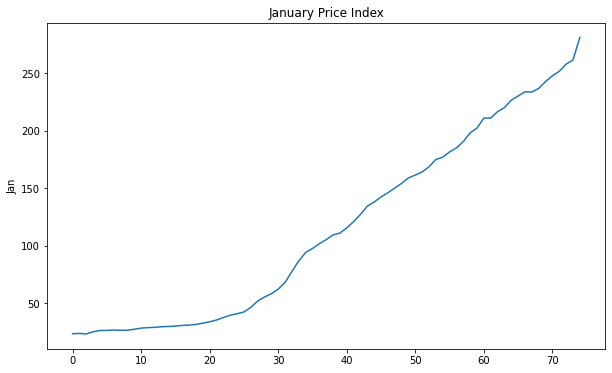

In [79]:
cpi_u['Jan'].plot(figsize=(10,6),title='January Price Index')
plt.ylabel('Jan')

Text(0.5, 0, 'Prices')

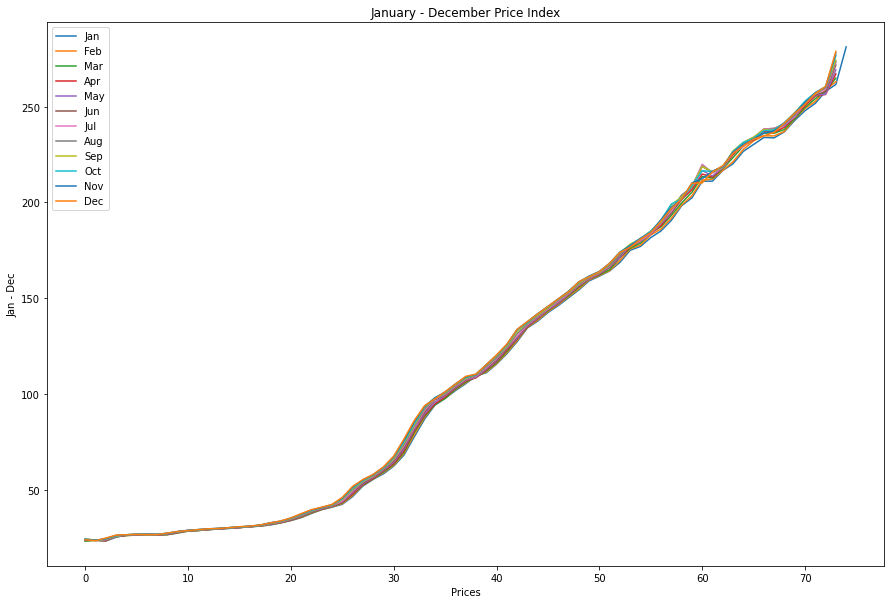

In [32]:
#   clearly see trend for the year

cpi_u[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].plot(figsize=(15,10),title='January - December Price Index')
plt.ylabel('Jan - Dec')
plt.xlabel('Prices')

In [90]:
cpi_u[:][:5]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,23.7,23.5,23.4,23.8,23.9,24.1,24.4,24.5,24.5,24.4,24.2,24.1
1,1949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
2,1950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
3,1951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
4,1952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7



## Double Exponential Smoothing

With exponential smoothing we are unable to use the simple method on the cpi due to it's pattern of distribution; however, to combat this issue we can use a double smoothing method that incorporates an additional parameter 'gamma' which serves to account for the lag in forecasting occurs **Check on this information**




## Hyperparameters

Establishing hyperparameters when defining the model to control the nature of the exponential smoothing performed for the series. If they are not specified the model will tune automatically.  

- **smoothing_level** (alpha): the smoothing coefficient for the level.
- **smoothing_slope** (beta): the smoothing coefficient for the trend.
- **smoothing_seasonal** (gamma): the smoothing coefficient for the seasonal component.
- **damping_slope** (phi): the coefficient for the damped trend.

A great

In [80]:
model = SimpletExpSmooth(cpi_u)
model_fit = model.fit()


### Alternate Version Using StatsModel TSA 


[Stats Model](https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing)




In [62]:
cpi_u.plot.line(x = cpi_u['Year'], y = 'Jan')
plt.show()

KeyError: "None of [Int64Index([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,\n            1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,\n            1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,\n            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,\n            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,\n            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,\n            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],\n           dtype='int64')] are in the [columns]"

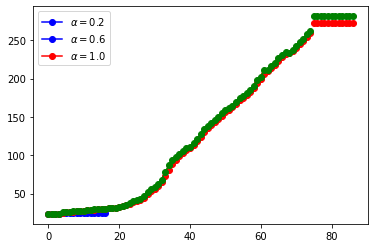

In [63]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(ccpi['Jan']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(cpi_u['Jan']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(cpi_u['Jan']).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()


### ACF/PACF

- **Autocorrelation Function (ACF)**. The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
- **Partial Autocorrelation Function (PACF)**. The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

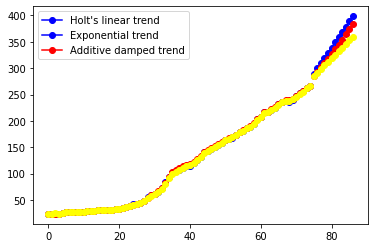

In [70]:
fit1 = Holt(cpi_u['Jan']).fit(smoothing_level=0.9, smoothing_slope=0.4, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(cpi_u['Jan'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")
#
fit3 = Holt(cpi_u['Jan'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")
#
#
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='yellow')
fcast3.plot(color='yellow', marker="o", legend=True)

plt.show()


## Kaggle Example


In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [3]:
cpi_u = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data_2/SeriesReport-cpi-all-u-notadj.48.csv',index_col=['Year'], parse_dates=['Year'])
cpi_w = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data_2/SeriesReport-cpi-urbwage-notadj.48.csv', index_col=['Year'], parse_dates=['Year'])

In [4]:
cpi_u.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948-01-01,23.7,23.5,23.4,23.8,23.9,24.1,24.4,24.5,24.5,24.4,24.2,24.1
1949-01-01,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6
1950-01-01,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0
1951-01-01,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5
1952-01-01,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7


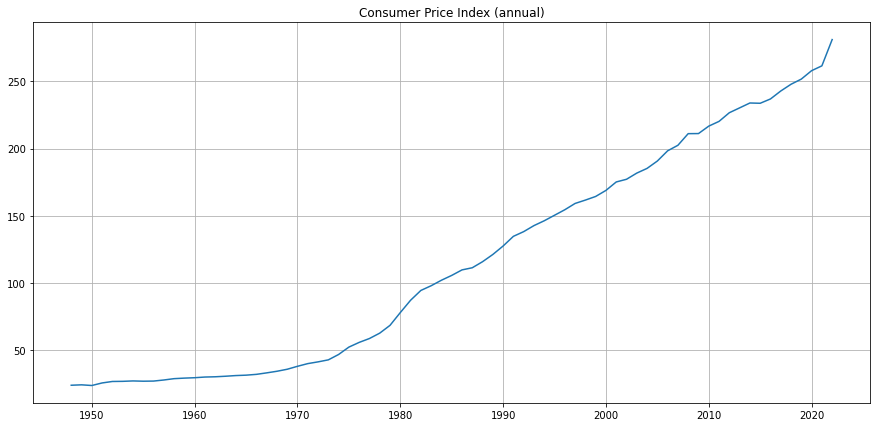

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(cpi_u.Jan)
plt.title('Consumer Price Index (annual)')
plt.grid(True)
plt.show()

**Mean Squared Logarithmic Error**: practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has **exponential trends**
, [0,+∞)
MSLE=1n∑i=1n(log(1+yi)−l

In [7]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_squared_log_error(y_true, y_pred):
    return np.mean(np.abs((np.log(y_true + 1) - np.log(y_pred + 1)) / np.log(y_true + 1))) * 100

Let's start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like  ŷ t=yt−1
  (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its  k
  previous values. Therefore, we will use the **moving average**.

ŷ t=1k∑n=1kyt−n
 

In [15]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(cpi_u['Jan'], 12) # prediction for the last month day (past 24 hours)

243.7355

In [16]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)


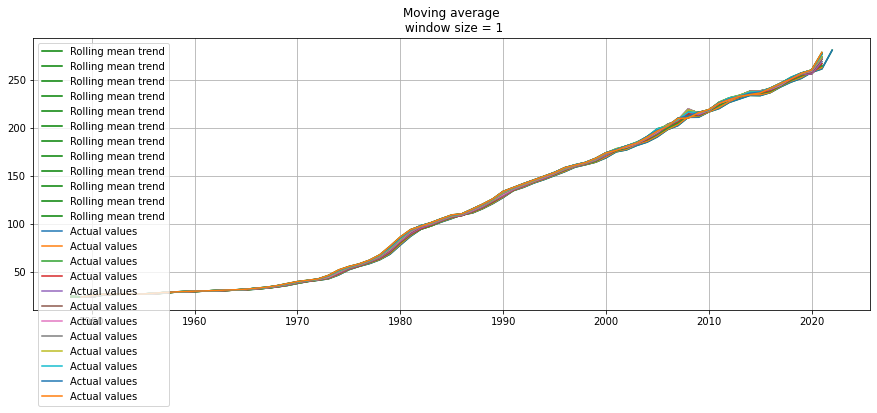

In [25]:
plotMovingAverage(cpi_u, 1) 

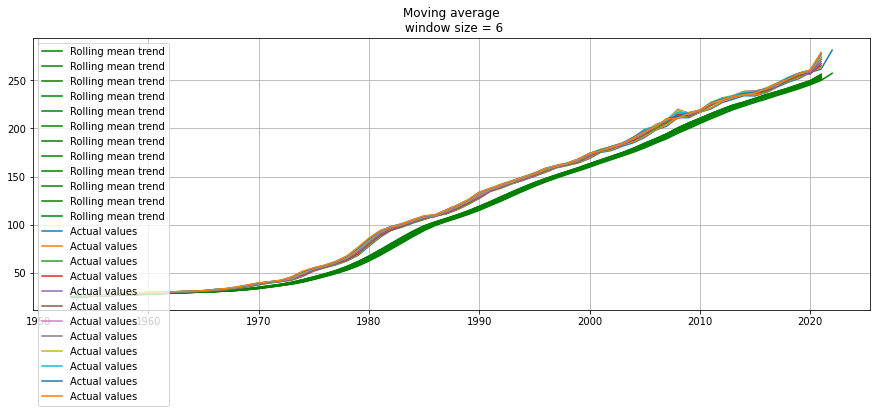

In [26]:
plotMovingAverage(cpi_u, 6) 

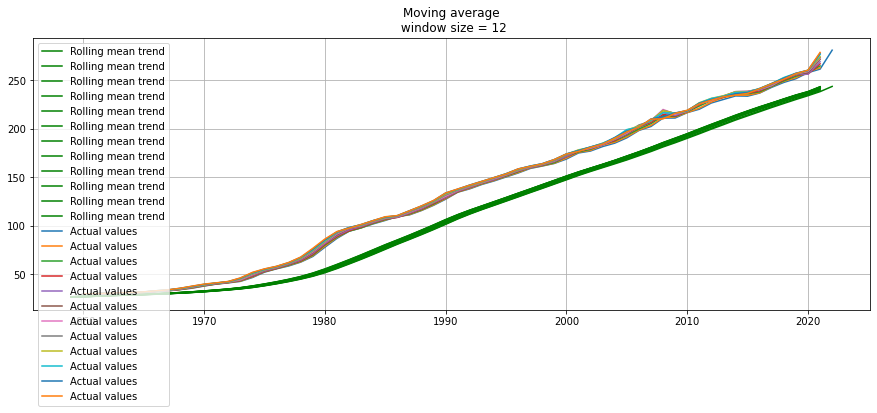

In [44]:
plotMovingAverage(cpi_u, 12) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

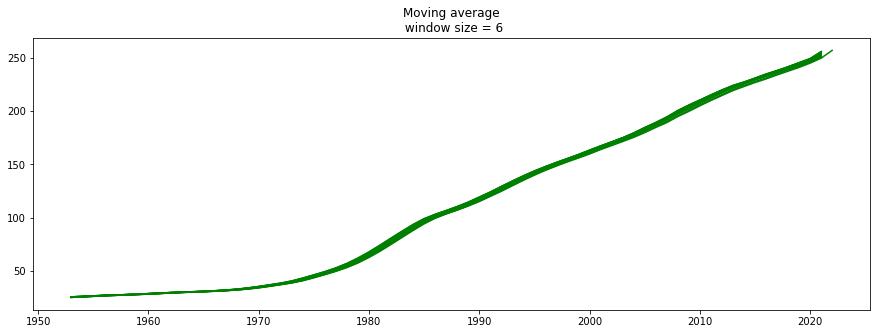

In [42]:
plotMovingAverage(cpi_u, 6, 'Jan', 'Jan_MA') 
plot, ax = plt.subplots(figsize=(15, 7))
ax.plot(cpi_u.Jan, label='Jan')


### Weighted Average


In [ ]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)


## Exponential smoothing

Now, let's see what happens if, instead of weighting the last  k
  values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for exponential smoothing that will help us with this:

ŷ t=α⋅yt+(1−α)⋅ŷ t−1
 

Here the model value is a weighted average between the current true value and the previous model values. The  α
  weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller  α
  is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function -- we multiply by  (1−α)
 each time, which already contains a multiplication by  (1−α)
  of previous model values.

In [ ]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

In [ ]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])

In [ ]:
plotExponentialSmoothing(currency.GEMS_GEMS_SPENT, [0.3, 0.05])


### Double exponential smoothing

Up to now, the methods that we've discussed have been for a single future point prediction (with some nice smoothing). That is cool, but it is also not enough. Let's extend exponential smoothing so that we can predict two future points (of course, we will also include more smoothing).

Series decomposition will help us -- we obtain two components: intercept (i.e. level)  ℓ
 and slope (i.e. trend)  b
 . We have learnt to predict intercept (or expected series value) with our previous methods; now, we will apply the same exponential smoothing to the trend by assuming that the future direction of the time series changes depends on the previous weighted changes. As a result, we get the following set of functions:

ℓx=αyx+(1−α)(ℓx−1+bx−1)
 

bx=β(ℓx−ℓx−1)+(1−β)bx−1
 

ŷ x+1=ℓx+bx
 

The first one describes the intercept, which, as before, depends on the current value of the series. The second term is now split into previous values of the level and of the trend. The second function describes the trend, which depends on the level changes at the current step and on the previous value of the trend. In this case, the  β
  coefficient is a weight for exponential smoothing. The final prediction is the sum of the model values of the intercept and trend.

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

In [ ]:
plotDoubleExponentialSmoothing(ads.Ads, alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [ ]:
plotDoubleExponentialSmoothing(currency.GEMS_GEMS_SPENT, alphas=[0.9, 0.02], betas=[0.9, 0.02])


### Triple exponential smoothing a.k.a. Holt-Winters

We've looked at exponential smoothing and double exponential smoothing. This time, we're going into triple exponential smoothing.

As you could have guessed, the idea is to add a third component - seasonality. This means that we should not use this method if our time series is not expected to have seasonality. Seasonal components in the model will explain repeated variations around intercept and trend, and it will be specified by the length of the season, in other words by the period after which the variations repeat. For each observation in the season, there is a separate component; for example, if the length of the season is 7 days (a weekly seasonality), we will have 7 seasonal components, one for each day of the week.

With this, let's write out a new system of equations:

ℓx=α(yx−sx−L)+(1−α)(ℓx−1+bx−1)
 

bx=β(ℓx−ℓx−1)+(1−β)bx−1
 

sx=γ(yx−ℓx)+(1−γ)sx−L
 

ŷ x+m=ℓx+mbx+sx−L+1+(m−1)modL
 

The intercept now depends on the current value of the series minus any corresponding seasonal component. Trend remains unchanged, and the seasonal component depends on the current value of the series minus the intercept and on the previous value of the component. Take into account that the component is smoothed through all the available seasons; for example, if we have a Monday component, then it will only be averaged with other Mondays. You can read more on how averaging works and how the initial approximation of the trend and seasonal components is done here. Now that we have the seasonal component, we can predict not just one or two steps ahead but an arbitrary m
  future steps ahead, which is very encouraging.

Below is the code for a triple exponential smoothing model, which is also known by the last names of its creators, Charles Holt and his student Peter Winters. Additionally, the Brutlag method was included in the model to produce confidence intervals:

ŷ maxx=ℓx−1+bx−1+sx−T+m⋅dt−T
 

ŷ minx=ℓx−1+bx−1+sx−T−m⋅dt−T
 

dt=γ∣yt−ŷ t∣+(1−γ)dt−T,
 

where  T
  is the length of the season,  d
  is the predicted deviation. Other parameters were taken from triple exponential smoothing. You can read more about the method and its applicability to anomaly detection in time series here.

In [ ]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])


### Time series cross validation

Before we start building a model, let's first discuss how to estimate model parameters automatically.

There is nothing unusual here; as always, we have to choose a loss function suitable for the task that will tell us how closely the model approximates the data. Then, using cross-validation, we will evaluate our chosen loss function for the given model parameters, calculate the gradient, adjust the model parameters, and so on, eventually descending to the global minimum.

You may be asking how to do cross-validation for time series because time series have this temporal structure and one cannot randomly mix values in a fold while preserving this structure. With randomization, all time dependencies between observations will be lost. This is why we will have to use a more tricky approach in optimizing the model parameters. I don't know if there's an official name to this, but on CrossValidated, where one can find all answers but the Answer to the Ultimate Question of Life, the Universe, and Everything, the proposed name for this method is "cross-validation on a rolling basis".

The idea is rather simple -- we train our model on a small segment of the time series from the beginning until some  t
 , make predictions for the next  t+n
  steps, and calculate an error. Then, we expand our training sample to  t+n
  value, make predictions from  t+n
  until  t+2∗n
 , and continue moving our test segment of the time series until we hit the last available observation. As a result, we have as many folds as  n
  will fit between the initial training sample and the last observation.

Now, knowing how to set up cross-validation, we can find the optimal parameters for the Holt-Winters model. Recall that we have daily seasonality in ads, hence the slen=24 parameter.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))